In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/athlete_events.csv')
region_df=pd.read_csv('/content/noc_regions.csv')

In [3]:
df=df[df['Season']=='Summer']

In [4]:
df=df.merge(region_df,on='NOC',how='left')

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df=pd.concat([df,pd.get_dummies(df['Medal'],dtype=int)],axis=1)

 **MEDAL** **TALLY**

In [7]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])

In [8]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [9]:
medal_tally

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


**OVERALL ANALYSIS**

In [10]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [11]:
nation_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().sort_index()

In [12]:
nation_over_time = nation_over_time.rename('no_of_countries')


In [13]:
import plotly.express as px

In [14]:
fig=px.line(nation_over_time,x=nation_over_time.index,y='no_of_countries')
fig.show()

In [15]:
X=df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

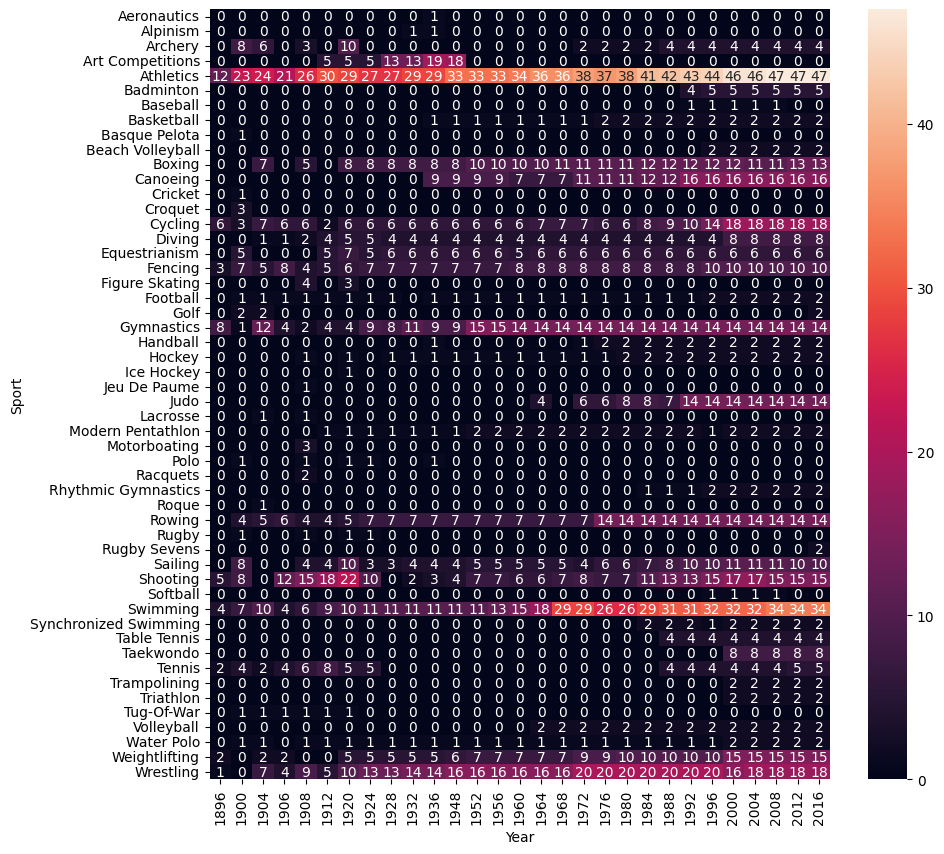

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [17]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
        x = temp_df['Name'].value_counts().reset_index().head(15)
        x.rename(columns={'index': 'Name'}, inplace=True)
        x = x.merge(df, left_on='Name', right_on='Name', how='left')[
            ['Name', 'Sport', 'region']].drop_duplicates('Name')
        x.rename(columns={'Name_x': 'Medals'}, inplace=True)
        return x

In [18]:
most_successful(df,'Hockey')

,Name,Sport,region
0,"Luciana Paula ""Lucha"" Aymar",Hockey,Argentina
4,Udham Singh Kular,Hockey,India
8,Teun Floris de Nooijer,Hockey,Netherlands
13,Leslie Walter Claudius,Hockey,India
17,Naomi Frances van As,Hockey,Netherlands
20,"Mara de la Paz ""Maripi"" Hernndez Margalot",Hockey,Argentina
23,Andreas Keller,Hockey,Germany
26,Abdul Rashid,Athletics,Pakistan
32,"Mara Mercedes ""Mechi"" Margalot",Hockey,Argentina
35,Saeed Anwar,Hockey,Pakistan


**COUNTRY_WISE ANALYSIS**

In [19]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

<ipython-input-19-66bfb9a1f24e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
new_df=temp_df[temp_df['region']=='USA']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

In [21]:
fig=px.line(final_df,x='Year',y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

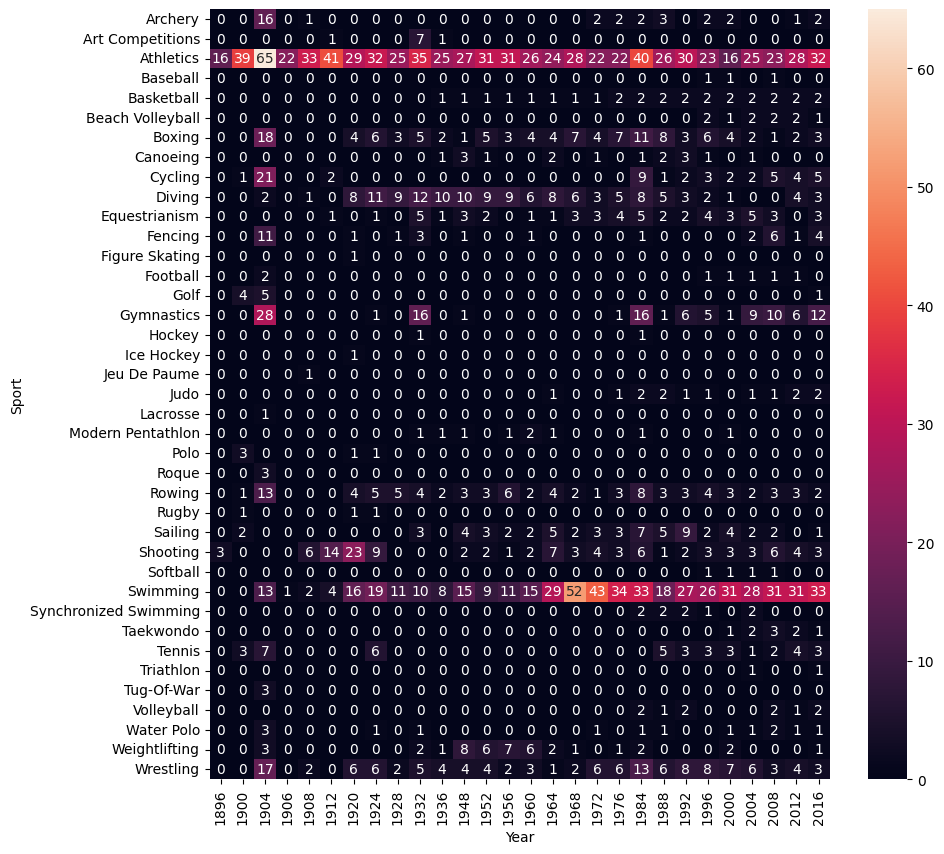

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [23]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    x = temp_df['Name'].value_counts().reset_index().head(15)
    x.rename(columns={'index': 'Name'}, inplace=True)
    x = x.merge(df, left_on='Name', right_on='Name', how='left')[
            ['Name', 'Sport', ]].drop_duplicates('Name')
    x.rename(columns={'Name_x': 'Medals'}, inplace=True)
    return x

In [24]:
most_successful(df,'USA')

,Name,Sport
0,"Michael Fred Phelps, II",Swimming
30,Ryan Steven Lochte,Swimming
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming
61,Natalie Anne Coughlin (-Hall),Swimming
73,"Dara Grace Torres (-Hoffman, -Minas)",Swimming
86,"Matthew Nicholas ""Matt"" Biondi",Swimming
98,Carl Townsend Osburn,Shooting
114,Mark Andrew Spitz,Swimming
126,"Raymond Clarence ""Ray"" Ewry",Athletics
136,"Frederick Carlton ""Carl"" Lewis",Athletics


**ATHELETE_WISE ANALYSIS**

In [26]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [27]:
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [29]:
!pip install plotly
import plotly.figure_factory as ff

In [30]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [31]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

<ipython-input-31-b3cc39faac17>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Height', ylabel='Weight'>

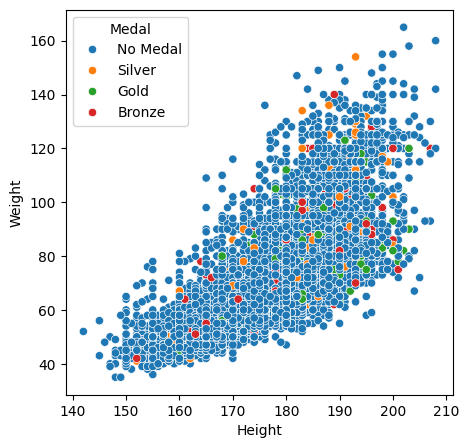

In [35]:
plt.figure(figsize=(5,5))
temp_df=athlete_df[athlete_df['Sport']=='Athletics']
sns.scatterplot(data=temp_df, x='Height', y='Weight', hue='Medal')

In [38]:
men=athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women=athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [39]:
final=men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [40]:
fig=px.line(final,x='Year',y=['Male','Female'])
fig.show()